## Testing the New Models

### Meyer Dataset

#### Reconstruction Property

Imports

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Data

In [10]:
data=np.load('data/dataset_meyer/dataset_meyer_test_256_15k_a_1-10_b_04-06_c_003-01.npz')
n=data['density']
f=data['F']
e=data['energy']
n_torch=torch.from_numpy(n)[-100:]
f_torch=torch.from_numpy(f)[-100:]
e_torch=torch.from_numpy(e)[-100:]
model=torch.load('model_dft_pytorch/meyer_case/DFTVAEnorm_hidden_channels_vae_[60, 60, 60, 60, 60]_hidden_channels_dft_[60, 60, 60]_kernel_size_13_pooling_size_2_latent_dimension_8__loaded',map_location='cpu')
#model=torch.load('model_dft_pytorch/meyer_case/meyer_model_60_hc_13_ks_2_ps_[40, 40, 40, 40, 40]_hidden_neurons_16_ls_0.0_alpha_0.01_vb',map_location='cpu')
model.eval()


DFTVAEnorm(
  (Encoder): Encode(
    (conv_list): ModuleList(
      (block_0): Sequential(
        (0): Conv1d(1, 60, kernel_size=(13,), stride=(1,), padding=(6,), padding_mode=circular)
        (1): Softplus(beta=1, threshold=20)
        (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
        (3): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (block_1): Sequential(
        (0): Conv1d(60, 60, kernel_size=(13,), stride=(1,), padding=(6,), padding_mode=circular)
        (1): Softplus(beta=1, threshold=20)
        (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
        (3): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (block_2): Sequential(
        (0): Conv1d(60, 60, kernel_size=(13,), stride=(1,), padding=(6,), padding_mode=circular)
        (1): Softplus(beta=1, threshold=20)
        (2): AvgPool1d(kernel_size=(2,), stride=(2,), padding=(0,))
        (3): BatchNorm1

Reconstruction Test

In [8]:
n_torch = n_torch.unsqueeze(1)
latent_mu, latent_logvar = model.Encoder(n_torch)
n_recon = model.Decoder(latent_mu)
dx=1/256
print(n_recon.shape)
dn=torch.sum(torch.abs(n_torch.squeeze(1)-n_recon.squeeze(1)),dim=-1)*dx
dn=dn.mean()
print(dn.item())

RuntimeError: expected scalar type Double but found Float

Visualization

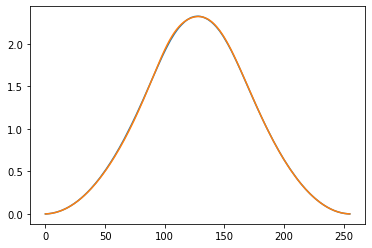

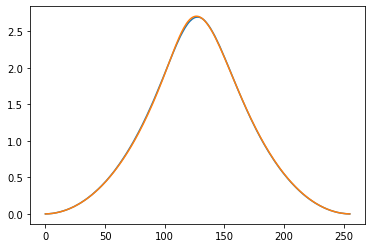

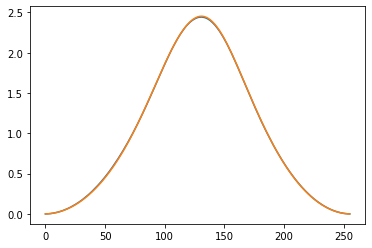

In [4]:
n_recon_img=n_recon.squeeze(1).detach().cpu().numpy()
n_img=n_torch.squeeze(1).detach().cpu().numpy()

for i in range(3):
    plt.plot(n_recon_img[i])
    plt.plot(n_img[i])
    plt.show()

Prediction Test (MODEL B)

In [ ]:
print(n_torch.shape)
latent_mu, latent_logvar = model.Encoder(n_torch)
f_ml=model.DFTModel(latent_mu).view(-1)

df=torch.abs(f_torch-f_ml)/torch.abs(f_ml)

print(df.mean()*627,df.std()*627)


Prediction Test (MODEL A)

In [10]:

f_ml=model.DFTModel(n_torch).view(-1)

df=torch.abs(f_torch-f_ml)/torch.abs(f_ml)

print(df.mean()*627,df.std()*627)

tensor(0.1973, dtype=torch.float64) tensor(0.1892, dtype=torch.float64)
